# Example
of the last added functionalities in onlineSG

In [38]:
g = game.example_game2()

In [40]:
'gioco' + ',' + str(g)

'10,1,2,player1,player1,player1'

'b2bw2w1'

<B2BW2W id:0 resources:1>

In [11]:
print(g)

<Game values:((1, 1), (2, 2)) players{} time_horizon:10>


In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import sys
sys.path.append('../')  # uncomment to add the path to the onlineSG folder 
# You have to change the path if you move this file.
# Alternatevely add the onlineSG folder to your PYTHONPATH
# e.g. On Linux add this line on .bashrc:
# export PYTHONPATH="<absolute-path-to-onlineSG>:PYTHONPATH"
# then you can use onlineSG library from everywhere

In [1]:
import source.game as game
import source.player as player
import source.environment as environment
import source.errors as errors
import source.parsers as parsers
import source.players.attackers as attackers
import source.players.base_defenders as base_defenders
import source.players.defenders as defenders
import source.runner as runner
import source.players.detection as detection 
import source.util as util

from source.util import *
import numpy as np
import pandas as pd
from importlib import *
import time

In [25]:
# if you change something in the files, don't forget to reload
reload(player)
reload(base_defenders)
reload(attackers)
reload(defenders)
reload(errors)
reload(runner)
reload(parsers)
reload(game)
#reload(environment)
reload(detection)
reload(util)

<module 'source.util' from '/home/lorenzo/Scrivania/Polimi/Thesis/code/onlineSG/source/util.py'>

In [2]:
targets_dict = {i:[] for i in range(2,13)}
T = 15 #np.random.randint(2,10)
time_horizon =1000
while sum([len(targets_dict[x]) for x in range(2,13)]) < 9:
    targets = [round(x,3) for x in util.gen_norm_targets(T)]
    values = tuple((v, v) for v in targets)
    g = game.Game(values, time_horizon)
    g.attackers = [1]
    g.defenders = [0]
    s = util.support(g)
    if len(targets_dict[len(s)])==0:
        targets_dict[len(s)].append(s)

In [3]:
targets_dict

{2: [[0.839, 0.978]],
 3: [[0.863, 0.919, 0.737]],
 4: [[0.646, 0.885, 0.954, 0.748]],
 5: [[0.723, 0.769, 0.66, 0.825, 0.697]],
 6: [[0.726, 0.861, 0.814, 0.704, 0.728, 0.707]],
 7: [[0.976, 0.913, 0.851, 0.98, 0.791, 0.828, 0.955]],
 8: [[0.636, 0.661, 0.888, 0.69, 0.717, 0.637, 0.687, 0.897]],
 9: [[0.819, 0.849, 0.829, 0.848, 0.912, 0.83, 0.899, 0.955, 0.81]],
 10: [[0.846, 0.888, 0.797, 0.79, 0.759, 0.822, 0.865, 0.883, 0.999, 0.803]],
 11: [],
 12: []}

In [31]:
T = 2
P = 1
targets = translate(targets_dict[T][0])
distributions = []
for i in range(P):
    distributions.append(tuple(gen_distr(T)))
values = tuple((v, v) for v in targets)
g = game.Game(values, time_horizon)
#print(T, targets)
profiles = [attackers.StackelbergAttacker(g, 1),
            attackers.UnknownStochasticAttacker(g, 1)]
for d in distributions[1:]:
    #print(d)
    profiles.append(attackers.StochasticAttacker(g, 1, 1, *d))
agent = defenders.BR_MAB(g, 0, 1)
#agent = detection.HOLMES(g, 0, 1, 1)
attacker = attackers.StochasticAttacker(g, 1, 1, *distributions[0])
g.set_players([agent], [attacker], profiles)

In [5]:
from copy import deepcopy

In [34]:
c = runner.Configuration(deepcopy(g), "trial", "trial", False)

In [18]:
c2 = runner.Configuration(deepcopy(g), "trial", "trial2", False)

In [33]:
rm -rf trial/trial

In [13]:
start_time = time.time()
e.run_interaction()
print(time.time() - start_time)
print(game_str(e.game, lenght=7))
print(e.agent.belief)
print(e.game.strategy_history[-1])


0.07503485679626465
□	 	
0.864	0.735	
△	 	
{<UnknownStochasticAttacker id:1 resources:1>: 1.0, <StackelbergAttacker id:1 resources:1>: 0.0}
{0: (0.5413377110694184, 0.4586622889305816), 1: [0.90856520774493654, 0.091434792255063443]}


In [35]:
c.run(1)

In [12]:
rm -rf trials

In [11]:
import pickle

In [41]:
comp = [c, c2]
name = None
fun_str = "exp_regret"
path = "trial"
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.6, 0.75])
cmap = plt.get_cmap('gnuplot')
colors = [cmap(i) for i in np.linspace(0, 1, len(comp))]
z = 1.96
if name is None:
    name = fun_str
for i, c in enumerate(comp):
    f = [e.__dict__[fun_str] for e in c.experiments]
    avg_f = (sum(f, np.zeros(len(f[0]))) / len(f))
    variances = (sum([[(p - avg_f[j]) * (p - avg_f[j])
                       for j, p in enumerate(f[i])]
                      for i, e in enumerate(c.experiments)],
                     np.zeros(len(f[0]))) / (len(f) - 1))
    upper_bound = [a + z * sqrt(variances[i] / len(f))
                   for i, a in enumerate(avg_f)]
    lower_bound = [a - z * sqrt(variances[i] / len(f))
                   for i, a in enumerate(avg_f)]
    ax.plot(avg_f, label=c.name,
             color=colors[i])
    ax.fill_between(list(range(len(lower_bound))), upper_bound,
                     lower_bound, color=colors[i], alpha=0.3, label=c.name)


In [51]:
handles, labels = ax.get_legend_handles_labels()
handles = [h for h in handles if isinstance(h,matplotlib.lines.Line2D )]
labels = [h._label for h in handles]

In [52]:
handles, labels

([<matplotlib.lines.Line2D at 0x7fc9fd766d30>,
 ['trial2', 'trial2'])

In [54]:
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [46]:
import matplotlib

In [55]:
ax.set_ylabel(fun_str)
ax.set_title(path + "/" + name + ".png" + "\n")  # +
          #str([v[0] for v in comp[0].game.values]))
fig.savefig(path + "/" + name + ".png",
            bbox_inches='tight')
with open("plot", mode='w+b') as file:
    pickle.dump(fig, file)

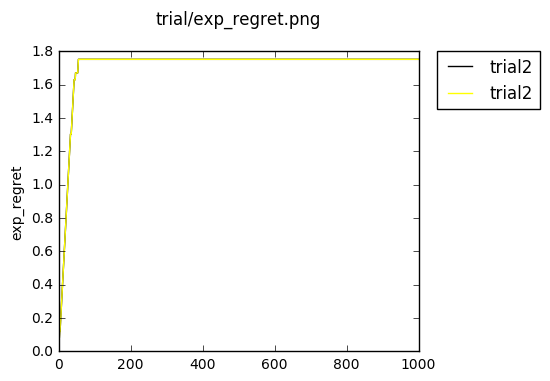

In [56]:
plt.show()